In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#讀取資料
data_path = 'data/'
train_data = pd.read_csv(data_path + 'titanic_train.csv')
test_data = pd.read_csv(data_path + 'titanic_test.csv')

In [2]:
#了解titanic的統計敘述:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Canavan, Miss. Mary",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
#修正欄位類型
train_data.PassengerId = train_data.PassengerId.astype('category')
train_data.Pclass = train_data.Pclass.astype(int)
train_data.Name = train_data.Name.astype('category')
train_data.Sex = train_data.Sex.astype('category')
train_data.Age = train_data.Age.astype(float)
train_data.SibSp = train_data.SibSp.astype(int)
train_data.Parch = train_data.Parch.astype(int)
train_data.Fare = train_data.Fare.astype(float)
train_data.Cabin = train_data.Cabin.astype('category')
train_data.Embarked = train_data.Embarked.astype('category')
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891.0,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,891.0,NaN,NaN,"van Melkebeke, Mr. Philemon",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,1.0,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


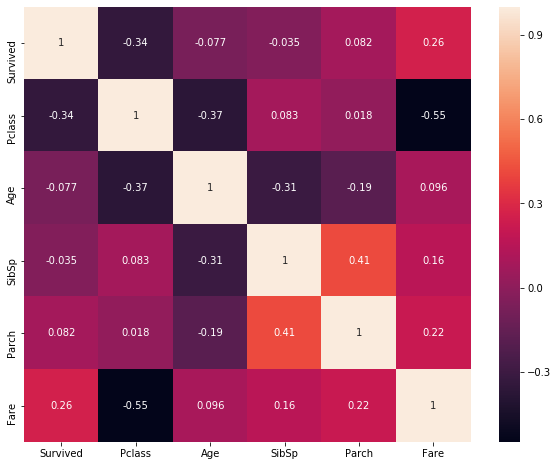

In [4]:
#使用seaborn的熱度圖觀察特徵之間的線性關係
plt.figure(figsize=(10, 8))
feature_corr = train_data.corr()
sns.heatmap(feature_corr, annot=True)

In [5]:
#Survived和Fare的線性關係為數字0.26，代表他們的線性關係為正，代表票價(Fare)越高則存活(Survived)的機率也越高。
#而所有與存活關聯的特徵最重要的是乘客等級(Pclass)，為-0.34的負相關，也就是說乘客等級數字越高則存活率越低

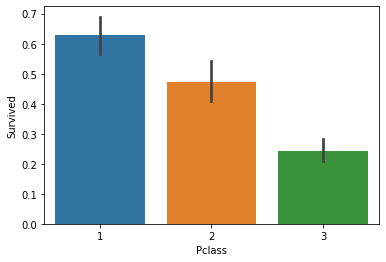

In [6]:
#各Pclass對應的生存率
sns.barplot('Pclass','Survived', data=train_data)

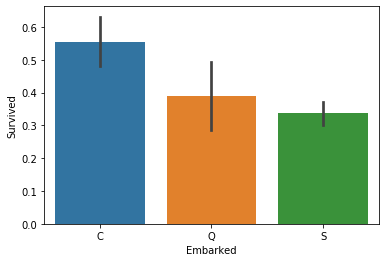

In [7]:
#各港口上船的乘客對應的生存率
sns.barplot('Embarked','Survived', data=train_data)

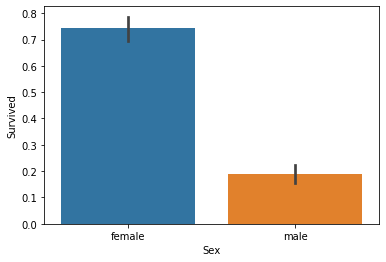

In [8]:
#性別對應的生存率
sns.barplot('Sex','Survived', data=train_data)

In [9]:
#觀察訓練集的缺值
print(train_data.isnull().sum())
#觀察測試集的缺值
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
#對dataframe丟棄指定欄位
def drop_col(df, col):
    return df.drop([col], axis=1)
#將丟棄欄位參數定為缺值過多的Cabin
from functools import partial
drop_cabin_col = partial(drop_col,
                         col='Cabin')

#對dataframe特定欄位以總體算術平均數做補值
def fillna_with_mean(df, col):
    df[col] = df[col].fillna(df[col].mean())
    return df
#特定欄位參數設為Age
age_fillna_with_mean = partial(fillna_with_mean, 
                               col='Age')

#特定欄位參數設為fare
fare_fillna_with_mean = partial(fillna_with_mean, 
                               col='Fare')

#對dataframe特定欄位以最常出現的值做為補值
def fillna_with_most_freq_val(df, col):
    most_freq_val = df[col].value_counts().index[0]
    df[col] = df[col].fillna(most_freq_val)
    return df
#欄位定為Embarked
embarked_fillna_with_most_freq_val = partial(fillna_with_most_freq_val,
                                             col='Embarked')

def apply(Funclist, df):
    if len(Funclist) > 0:
        return apply(Funclist[1:], Funclist[0](df))
    else:
        return df

#train data的資料處理流程
train_processing_steps = [drop_cabin_col,
                          age_fillna_with_mean, 
                          embarked_fillna_with_most_freq_val]
#test data的資料處理流程
test_processing_steps = [drop_cabin_col,
                         fare_fillna_with_mean,
                         age_fillna_with_mean]

In [11]:
train_data = apply(train_processing_steps, train_data)
test_data = apply(test_processing_steps, test_data)

In [12]:
#觀察訓練集的缺值
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#觀察測試集的缺值
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#觀察處理完畢的資料集缺值狀況，已經完全無缺值

In [15]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [16]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [17]:
train_data = pd.concat([train_data,sex,embark],axis=1)

In [18]:
X= train_data.drop('Survived', axis=1)
y= train_data['Survived']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
predictions = logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       154
           1       0.78      0.64      0.71       114

    accuracy                           0.77       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [26]:
output = pd.DataFrame({'PassengerId': X_test.index,
                       'Survived': predictions})

output.to_csv('submission.csv', index=False)